In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Problem Statement 1. To Predict People are Survied or Not Survied on Titanic Ship**

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df1 = df.drop(['PassengerId','Name','Ticket'], axis=1)

In [8]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

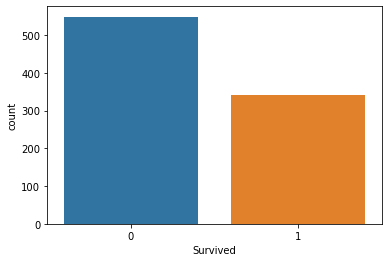

In [11]:
sns.countplot(x = 'Survived', data=df1)

In [12]:
df1['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

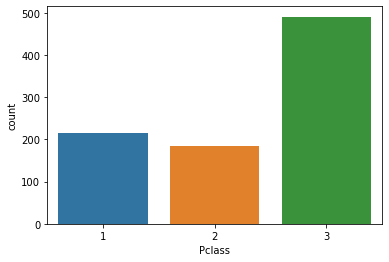

In [13]:
sns.countplot(x = 'Pclass', data=df1)

<AxesSubplot:xlabel='Sex', ylabel='count'>

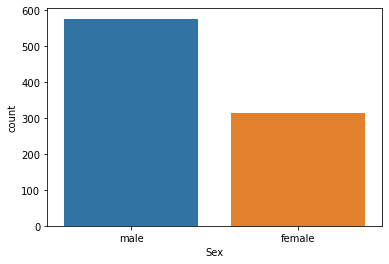

In [14]:
sns.countplot(x = 'Sex', data=df1)

In [15]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

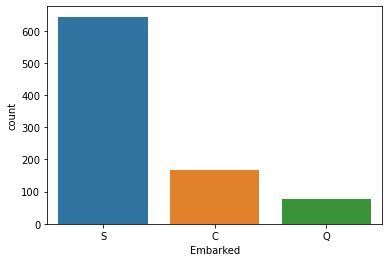

In [16]:
# Southampton, Cherbourg, and Queenstown
sns.countplot(x = 'Embarked', data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

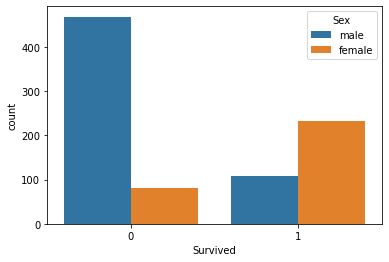

In [17]:
sns.countplot(x = 'Survived', hue= 'Sex', data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

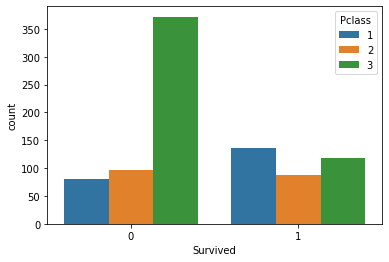

In [18]:
sns.countplot(x = 'Survived', hue= 'Pclass', data=df1)

<AxesSubplot:xlabel='Age', ylabel='count'>

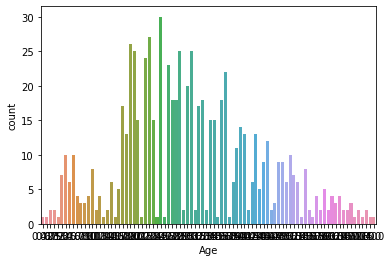

In [19]:
sns.countplot(x ="Age",data=df1)

<AxesSubplot:ylabel='Frequency'>

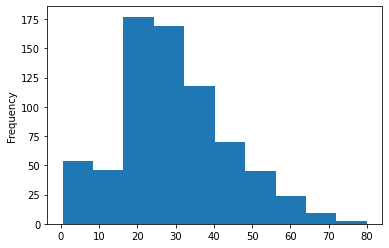

In [20]:
df['Age'].plot.hist()

<AxesSubplot:xlabel='Fare', ylabel='count'>

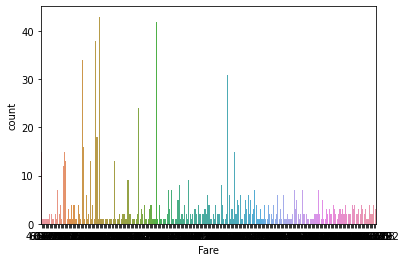

In [21]:
sns.countplot(x ="Fare",data=df1)

<AxesSubplot:ylabel='Frequency'>

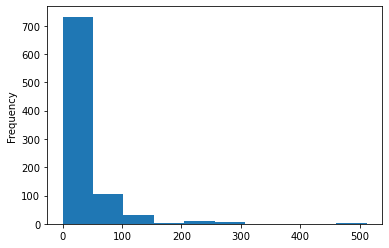

In [22]:
df['Fare'].plot.hist()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [24]:
df1.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

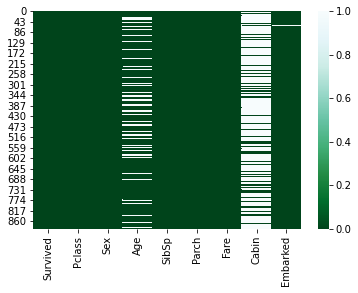

In [26]:
sns.heatmap(df1.isnull(), cmap='BuGn_r')

In [27]:
df2 = df1.drop('Cabin',axis=1)

In [28]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

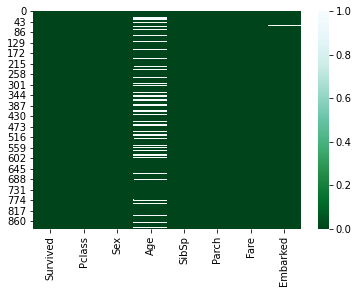

In [29]:
sns.heatmap(df2.isnull(), cmap='BuGn_r')

In [30]:
df2.dropna(inplace=True)

<AxesSubplot:>

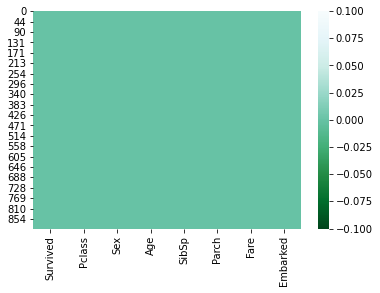

In [31]:
sns.heatmap(df2.isnull(), cmap='BuGn_r')

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [33]:
df2['Sex'].count()

712

In [34]:
df2['Sex'].unique()

array(['male', 'female'], dtype=object)

### Replace Method

In [37]:
Gender = pd.get_dummies(df2['Sex'])

In [38]:
Gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [35]:
Gender = pd.get_dummies(df2['Sex'],drop_first=True)

In [36]:
Gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [39]:
df2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
Embarked = pd.get_dummies(df2['Embarked'],drop_first=True)

In [41]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [42]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
df3 = pd.concat([df2, Gender, Embarked],axis=1)

In [44]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,1


In [45]:
df3.drop(['Sex','Embarked'],axis=1, inplace=True)

In [46]:
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   female    712 non-null    uint8  
 7   male      712 non-null    uint8  
 8   Q         712 non-null    uint8  
 9   S         712 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 41.7 KB


In [48]:
df3.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
Q           0
S           0
dtype: int64

In [49]:
df3.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762,-0.536762,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826,0.150826,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037,0.099037,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296,-0.106296,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543,-0.249543,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457,-0.182457,-0.062346,-0.250994
female,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000,-1.000000,0.027256,-0.109078
male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,-1.000000,1.000000,-0.027256,0.109078
Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,0.027256,-0.027256,1.000000,-0.378859
S,-0.159015,0.197831,-0.025431,0.018968,0.013259,-0.250994,-0.109078,0.109078,-0.378859,1.000000


<AxesSubplot:>

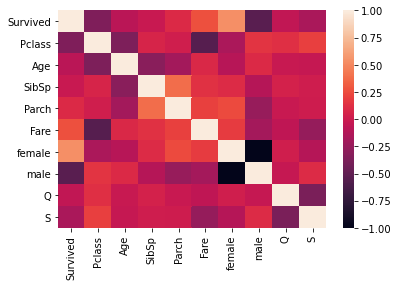

In [50]:
sns.heatmap(df3.corr())

### Independent and Depedent Variable

In [51]:
x = df3.drop('Survived', axis=1)

In [52]:
y = df3['Survived']

In [53]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [54]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Training and Tesiting 

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=False)

In [56]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
867,1,31.0,0,0,50.4958,0,1,0,1
332,1,38.0,0,1,153.4625,0,1,0,1
20,2,35.0,0,0,26.0000,0,1,0,1
606,3,30.0,0,0,7.8958,0,1,0,1
379,3,19.0,0,0,7.7750,0,1,0,1


In [57]:
y_train.head()

867    0
332    0
20     0
606    0
379    0
Name: Survived, dtype: int64

In [58]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
423,3,28.00,1,1,14.400,1,0,0,1
178,2,30.00,0,0,13.000,0,1,0,1
305,1,0.92,1,2,151.550,0,1,0,1
292,2,36.00,0,0,12.875,0,1,0,0
592,3,47.00,0,0,7.250,0,1,0,1


In [59]:
y_test.head()

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [60]:
x_train.shape

(569, 9)

In [61]:
y_train.shape

(569,)

In [62]:
y_test.shape

(143,)

In [64]:
log_model = LogisticRegression()

In [65]:
log_model.fit(x_train, y_train)

C:\Users\shyam.DESKTOP-3EM50G2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predict = log_model.predict(x_test)

In [67]:
print(predict[0:5])

[0 0 1 0 0]


In [68]:
y_test.head()

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
print(confusion_matrix(y_test, predict))

[[74  8]
 [18 43]]


In [71]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.84      0.70      0.77        61

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



In [72]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [73]:
accuracy_score(y_test, predict) * 100

81.81818181818183

In [74]:
mean_squared_error(y_test, predict) * 100

18.181818181818183

In [75]:
81.81818181818183 + 18.181818181818183

100.00000000000001

### AUC-ROC Curve

In [76]:
y_predict = log_model.predict(x_test)
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [77]:
y_predict_prob = log_model.predict_proba(x_test)

In [78]:
y_predict_prob1 = y_predict_prob[:,1]

In [80]:
y_predict_prob1

array([0.47813315, 0.24776749, 0.71130688, 0.28999357, 0.05796077,
       0.05747757, 0.68198549, 0.30674656, 0.21216731, 0.70824479,
       0.94986296, 0.60544425, 0.95721492, 0.14655657, 0.2309773 ,
       0.60589584, 0.25322251, 0.71953671, 0.304838  , 0.19156893,
       0.32362861, 0.72509479, 0.87980905, 0.33262602, 0.4003463 ,
       0.28208783, 0.22150676, 0.12129746, 0.43570997, 0.37844152,
       0.23849319, 0.0392986 , 0.14252786, 0.63939382, 0.73029082,
       0.82567586, 0.90679197, 0.43741836, 0.3340525 , 0.48375564,
       0.32835875, 0.10344646, 0.07631215, 0.09348417, 0.10992944,
       0.11133737, 0.9441623 , 0.17613012, 0.11732756, 0.95294806,
       0.67220502, 0.64165997, 0.58910949, 0.24636633, 0.58427457,
       0.51199353, 0.08731943, 0.08326574, 0.85981344, 0.30773552,
       0.44678737, 0.05043958, 0.20179536, 0.16594914, 0.27655326,
       0.13905023, 0.91919586, 0.26303447, 0.9647205 , 0.76391827,
       0.24776749, 0.88144537, 0.84347491, 0.52717308, 0.06616

In [81]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [82]:
y_predict_prob1[:5]

array([0.47813315, 0.24776749, 0.71130688, 0.28999357, 0.05796077])

In [83]:
y_test[:5]

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [84]:
y_predict[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_predict_prob1)

In [87]:
roc_auc_score(y_test, y_predict_prob1)

0.8758496601359456

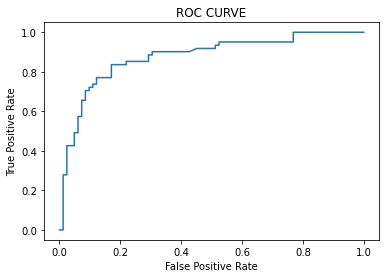

In [88]:
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

In [ ]:
# https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102